
# 2 - Data exploration


In [1]:
# import parameters
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

## 2.1 Incidents data overview

In [2]:
incidents = pd.read_excel('../data/incidents_2019-08-01/hl2010toPresent.xlsx', 
                          sheet_name=1)

incidents.sample(5)

,DATAFILE_AS_OF,SIGNIFICANT,SERIOUS,IPE,IA_IPE,OM_IPE,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,REPORT_TYPE,...,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
186,2019-07-31 08:37:40,NO,NO,NO,NO,NO,20100193,19626,2010-09-02 19:48:25,SUPPLEMENTAL FINAL,...,LEAD PIPELINE SAFETY SPECIALIST,bdmctiernan@sunocoinc.com,610-859-3347,877-588-8590,2014-08-03,BRIAN D. MC TIERNAN,LEAD PIPELINE SAFETY SPECIALIST,610-859-3347,bdmctiernan@sunocoinc.com,"ON 8/31/2010 AT APPROXIMATELY 0130 HOURS, AN O..."
573,2019-07-31 08:37:40,NO,NO,NO,NO,NO,20110366,17431,2011-09-28 10:57:38,SUPPLEMENTAL FINAL,...,SR. COMPLIANCE COORDINATOR,ken.lybarger@magellanlp.com,918-574-7315,918-574-7246,2013-03-07,KENNETH L. LYBARGER,SR. COMPLIANCE COORDINATOR,918-574-7315,ken.lybarger@magellanlp.com,A CORROSION COUPON HOLDER WAS OBSERVED TO BE L...
3754,2019-07-31 08:37:40,YES,NO,YES,NO,NO,20190171,32207,2019-05-28 15:55:52,ORIGINAL,...,ERC COMPLIANCE SPECIALIST,nagonzalez@paalp.com,713-646-4376,NaN,2019-05-28,NGIABI GICUHI,ERC MGR DIRECTOR,713-646-4336,ngicuhi@paalp.com,APPROXIMATELY 89 BARRELS OF CRUDE OIL WERE REL...
744,2019-07-31 08:37:40,NO,NO,YES,YES,NO,20120084,16506,2012-03-19 13:32:21,ORIGINAL,...,FACILITY COMPLIANCE OFFICER,ccasnelli@apexoil.hrcoxmail.com,757-651-3273,757-622-3989,2012-03-19,CHRIS CASNELLI,FACILITY COMPLIANCE OFFICEDR,757-651-3273,ccasnelli@apexoil.hrcoxmail.com,"ON FEBRUARY 17, 2012, PETROLEUM FUEL & TERMINA..."
2602,2019-07-31 08:37:40,NO,NO,NO,NO,NO,20160269,21646,2016-08-31 09:05:06,ORIGINAL FINAL,...,DOT COMPLIANCE MANAGER,tgnardozzi@sunocologistics.com,281-637-6576,877-917-0448,2016-08-31,TODD G. NARDOZZI,DOT COMPLIANCE MANAGER,281-637-6576,tgnardozzi@sunocologistics.com,DURING ROUTINE OPERATIONS AT CORSICANA STATION...


In [3]:
incidents['NAME'].value_counts().head(10)

ENTERPRISE CRUDE PIPELINE LLC          276
ENTERPRISE PRODUCTS OPERATING LLC      214
SUNOCO PIPELINE L.P.                   211
PLAINS PIPELINE, L.P.                  203
MAGELLAN PIPELINE COMPANY, LP          180
COLONIAL PIPELINE CO                   177
BUCKEYE PARTNERS, LP                   148
PHILLIPS 66 PIPELINE LLC               121
KINDER MORGAN LIQUID TERMINALS, LLC    117
MARATHON PIPE LINE LLC                 111
Name: NAME, dtype: int64

In [4]:
incidents['OPERATOR_ID'].value_counts().head(10)

30829    282
31618    214
18718    211
300      202
22610    180
2552     177
31684    155
1845     148
26041    117
32109    112
Name: OPERATOR_ID, dtype: int64

There seem to be some minor discrepancies between ID and name. Matching every ID to its most common company name should fix it. 

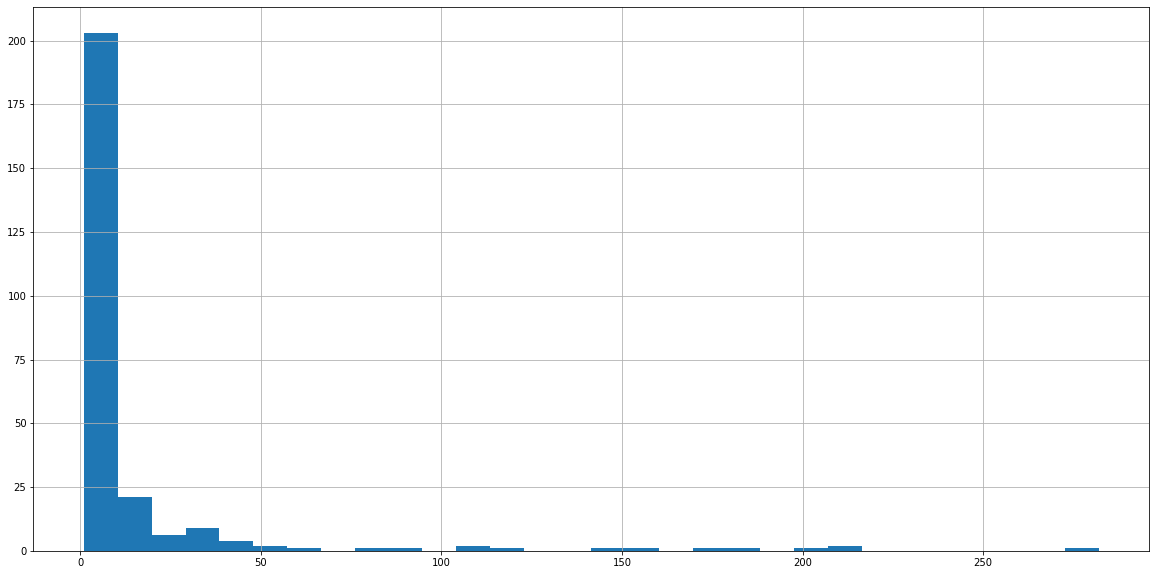

In [5]:
incidents['OPERATOR_ID'].value_counts().hist(bins=30, figsize=(20, 10))

In [6]:
len(incidents)

3819

## 2.2 Oil pipeline data

In [7]:
oil_pipelines = pd.read_excel('../data/pipeline_sytem_2019-08-01/annual_hazardous_liquid_2010.xlsx', skiprows=2)

In [8]:
oil_pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,...,PARTE2010HF,PARTE2010LF,PARTE2010TOTAL,PARTETOTAL,PARTETOTALHF,PARTETOTALLF,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
165,2019-07-01 10:31:50,2010,20110097,10098,26103,"TEXAS EASTMAN DIVISION, EASTMAN CHEMICAL CO",PO BOX 7444,LONGVIEW,TX,75607,...,0.00,0.0,0.00,402.70,218.30,184.40,INITIAL,2011-08-11 12:42:58,2011-08-11 12:42:58,7000-1.1 (Rev. 06-2011)
205,2019-07-01 10:31:50,2010,20110014,11084,30901,AIRCRAFT SERVICES INTERNATIONAL GROUP (ASIG),6000 DEHAVILLAND DRIVE,ANCHORAGE,AK,99502,...,0.00,0.0,0.00,7.10,7.10,0.00,SUPPLEMENTAL,2011-07-28 18:23:42,2012-05-15 14:03:24,7000-1.1 (Rev. 06-2011)
99,2019-07-01 10:31:50,2010,20110316,12374,15674,PLANTATION PIPE LINE CO,500 Dallas Suite 1000,ALPHARETTA,Texas,77002,...,0.11,0.0,0.11,696.50,567.34,129.16,SUPPLEMENTAL,2011-08-15 17:26:40,2013-07-10 15:08:57,7000-1.1 (Rev. 06-2011)
62,2019-07-01 10:31:50,2010,20110366,10384,8014,IDAHO PIPELINE CORP,POB 35236,SARASOTA,FL,34242,...,0.00,0.0,0.00,2.00,2.00,0.00,INITIAL,2011-08-16 13:36:13,2011-08-16 13:36:13,7000-1.1 (Rev. 06-2011)
318,2019-07-01 10:31:50,2010,20110369,11002,31684,CONOCOPHILLIPS,600 North Dairy Ashford,NaN,TX,77079,...,0.00,0.0,0.00,3150.12,949.40,2200.72,SUPPLEMENTAL,2011-08-16 15:00:34,2012-04-02 09:31:51,7000-1.1 (Rev. 06-2011)


In [9]:
from os import listdir

pipeline_files = [file for file in listdir('../data/pipeline_sytem_2019-08-01/') if'annual_hazardous_liquid' in file]
pipeline_files

['annual_hazardous_liquid_2017.xlsx',
 'annual_hazardous_liquid_2011.xlsx',
 'annual_hazardous_liquid_2014.xlsx',
 'annual_hazardous_liquid_2012.xlsx',
 'annual_hazardous_liquid_2013.xlsx',
 'annual_hazardous_liquid_2010.xlsx',
 'annual_hazardous_liquid_2018.xlsx',
 'annual_hazardous_liquid_2016.xlsx',
 'annual_hazardous_liquid_2015.xlsx']

In [10]:
pipelines = pd.concat([pd.read_excel(f'../data/pipeline_sytem_2019-08-01/{file}', skiprows=2) for file in pipeline_files])
pipelines = pipelines.reset_index(drop = True)

pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,...,PARTE2010HF,PARTE2010LF,PARTE2010TOTAL,PARTETOTAL,PARTETOTALHF,PARTETOTALLF,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
5125,2019-07-01 11:08:29,2015,20162111,14370,32532,"ENERGY XXI PIPELINE, LLC","1021 MAIN STREET, SUITE 2626",HOUSTON,TX,77002,...,0.0,0.0,0.0,21.1,0.0,21.1,INITIAL,2016-06-14 10:20:08,2016-06-14 10:20:08,7000-1.1 (Rev. 06-2014)
1247,2019-07-01 11:03:57,2014,20151631,13891,10012,NUSTAR PIPELINE OPERATING PARTNERSHIP L.P.,P.O. BOX 781609,San Antonio,TX,78278,...,1.6,0.0,1.6,1998.6,1998.6,0.0,SUPPLEMENTAL,2015-06-15 20:29:59,2015-08-17 15:31:47,7000-1.1 (Rev. 06-2014)
1470,2019-07-01 11:03:57,2014,20151350,13471,31580,"MAGELLAN TERMINALS HOLDINGS, LP",ONE WILLIAMS CENTER P.O. BOX 22186,TULSA,OK,74172,...,1.0,0.0,1.0,14.0,12.5,1.5,INITIAL,2015-06-10 09:27:08,2015-06-10 09:27:08,7000-1.1 (Rev. 06-2014)
4831,2019-07-01 11:08:29,2015,20162241,14513,26065,CHS MCPHERSON REFINERY INC.,2000 S. MAIN,MCPHERSON,KS,67460,...,0.0,0.0,0.0,0.0,0.0,0.0,INITIAL,2016-06-15 13:06:04,2016-06-15 13:06:04,7000-1.1 (Rev. 06-2014)
5149,2019-07-01 11:08:29,2015,20162297,14575,32631,TESORO GREAT PLAINS MIDSTREAM LLC,19100 RIDGEWOOD PARKWAY,SAN ANTONIO,TX,78259,...,115.6,0.0,115.6,115.6,115.6,0.0,INITIAL,2016-06-15 19:53:39,2016-06-15 19:53:39,7000-1.1 (Rev. 06-2014)


See which company has the vastest pipeline network.

In [11]:
pipelines.loc[pipelines.groupby('OPERATOR_ID')['PARTBHCATOTAL'].idxmax()].nlargest(10, 'PARTBHCATOTAL')[['REPORT_YEAR', 'OPERATOR_ID', 'PARTA2NAMEOFCOMP', 'PARTBHCATOTAL']]

,REPORT_YEAR,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTBHCATOTAL
3631,2018,31618,ENTERPRISE PRODUCTS OPERATING LLC,7726.183
3700,2018,32109,"ONEOK NGL PIPELINE, LLC",4531.480
4708,2015,2552,COLONIAL PIPELINE CO,4500.920
4700,2015,1845,"BUCKEYE PARTNERS, LP",4266.430
3483,2018,22610,"MAGELLAN PIPELINE COMPANY, LP",3926.400
4120,2016,15674,PLANTATION PIPE LINE CO,2564.730
4020,2016,300,"PLAINS PIPELINE, L.P.",2312.330
67,2017,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",2290.000
3186,2010,31684,CONOCOPHILLIPS,2283.790
2693,2013,32147,MARATHON PIPE LINE LLC,2281.900


In [12]:
pipelines['PARTBHCATOTAL'].idxmax()

3631

## 2.3 FERC Notices

In [13]:
notices = pd.read_csv('../data/ferc_notices_2019-08-01.csv')

In [14]:
len(notices)

27890

Check whether any notes were read incorrectly (too many requests).

In [15]:
notices['full-text'].str.contains('too manyrequests').value_counts()

False    27890
Name: full-text, dtype: int64